Import the nessecary libraries, and add labels to the dataset.
Create a CSV file from that new data set and save it as a CSV file.
Use that CSV file as the main data set from now on.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zlib import crc32
from sklearn.model_selection import train_test_split
import seaborn as sns


'''
#---------read the attribute names first------------------
with open('Names.txt', 'r') as file:
    attributes = file.readlines()
columnNames = [line.split()[-2] for line in attributes if line.startswith('@attribute')]        #we are only interested in the name itself, delete everything else

#---------read the data-----------------
dataset = pd.read_csv('communities.data', header=None)
dataset.columns = columnNames
#dataset.to_csv('DatasetWithHeaders', index=False)      #Only need to run this once, so therefore its out
'''
datasetWithHeaders = pd.read_csv('DatasetWithHeaders', na_values=["?"])  #The new dataset with labels.
print(datasetWithHeaders.head())



   state  county  community        communityname  fold  population  \
0      8     NaN        NaN         Lakewoodcity     1        0.19   
1     53     NaN        NaN          Tukwilacity     1        0.00   
2     24     NaN        NaN         Aberdeentown     1        0.00   
3     34     5.0    81440.0  Willingborotownship     1        0.04   
4     42    95.0     6096.0    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          1.00          0.08          0.12  ...      0.02   
4           0.55          0.02          0.95          0.09  ...      0.04   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06  

Check how many columns contain missing values (denoted with "?") and find how much percent of that feature has missing values in it.

In [2]:

#columnsWithQuestionMark = [column for column in datasetWithHeaders.columns if datasetWithHeaders[column].astype(str).str.contains('\\NaN').any()]
columnsWithNaN = [column for column in datasetWithHeaders.columns if datasetWithHeaders[column].isna().any()]
columnPercentages = {}
listOfFeaturesWithMissingValue = []
# Calculate the percentage of "?" in each column and store the results
for column in columnsWithNaN:
    percentQuestionMark = (datasetWithHeaders[column].isna().mean() * 100)
    columnPercentages[column] = percentQuestionMark
    listOfFeaturesWithMissingValue.append(column)
#Print the percentages for columns with "?"
for column, percentage in columnPercentages.items():
    print(f"Percentage of 'NaN' values in column '{column}': {percentage:.2f}%")

print(listOfFeaturesWithMissingValue)



Percentage of 'NaN' values in column 'county': 58.88%
Percentage of 'NaN' values in column 'community': 59.03%
Percentage of 'NaN' values in column 'OtherPerCap': 0.05%
Percentage of 'NaN' values in column 'LemasSwornFT': 84.00%
Percentage of 'NaN' values in column 'LemasSwFTPerPop': 84.00%
Percentage of 'NaN' values in column 'LemasSwFTFieldOps': 84.00%
Percentage of 'NaN' values in column 'LemasSwFTFieldPerPop': 84.00%
Percentage of 'NaN' values in column 'LemasTotalReq': 84.00%
Percentage of 'NaN' values in column 'LemasTotReqPerPop': 84.00%
Percentage of 'NaN' values in column 'PolicReqPerOffic': 84.00%
Percentage of 'NaN' values in column 'PolicPerPop': 84.00%
Percentage of 'NaN' values in column 'RacialMatchCommPol': 84.00%
Percentage of 'NaN' values in column 'PctPolicWhite': 84.00%
Percentage of 'NaN' values in column 'PctPolicBlack': 84.00%
Percentage of 'NaN' values in column 'PctPolicHisp': 84.00%
Percentage of 'NaN' values in column 'PctPolicAsian': 84.00%
Percentage of 'Na

25 features have missing data, however 22 of the features have 84% of their data missing so we'll remove those from the list.
For "OtherPerCap" (which is referring to per capita income of whose ethnicity is other than the ones listed in the dataset) we will
use the mean and fill that in for the missing values.
We will also get rid of any "Not predictive" features except for state. These are:
county, community, communityname and fold.

In [3]:
#-------------Only run this block once, otherwise the columns with the missing values will come back--------



listOfFeaturesWithMissingValue = listOfFeaturesWithMissingValue[3:]
newDataSet = datasetWithHeaders.drop(columns=listOfFeaturesWithMissingValue)
cols = ['OtherPerCap']
newDataSet.fillna(newDataSet[cols].mean(), inplace=True)
newDataSet = newDataSet.drop(columns=['county','community','communityname','fold'])
newDataSet.to_csv('new_dataset.csv', index=False)

columnsWithMissingValues = newDataSet.columns[newDataSet.isna().any()].tolist()

# Check if there are any missing values
if columnsWithMissingValues:
    print("Columns with missing values:", columnsWithMissingValues)
else:
    print("No missing values in any column.")



No missing values in any column.


We have a supervised task. Its a multiple regression (a univariate regression because we are only trying to predict a single value) task, and we will use batch learning.

We will start with setting aside 20% of the data for Testing. This will be chosen randomly.



In [5]:


newTrainset, newTestSet = train_test_split(newDataSet, test_size=0.2, random_state=42)
print(f"Length of newTrainSet: {len(newTrainset)}") #Should be roughly 80% of the data
print(f"Length of newTestSet: {len(newTestSet)}") #Should be roughly 20% of the data
print(newTrainset.head())
newTrainset.describe()



Length of newTrainSet: 1595
Length of newTestSet: 399
      state  population  householdsize  racepctblack  racePctWhite  \
1378     28        0.30           0.48          1.00          0.14   
1826     34        0.00           0.45          0.01          0.96   
678      12        0.00           0.23          0.61          0.50   
1083     25        0.01           0.38          0.03          0.97   
1558      5        0.01           0.41          0.08          0.93   

      racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  ...  \
1378          0.03         0.01         0.51         0.56         0.39  ...   
1826          0.09         0.05         0.30         0.41         0.23  ...   
678           0.03         0.11         0.22         0.32         0.19  ...   
1083          0.03         0.02         0.61         0.62         0.55  ...   
1558          0.01         0.01         0.39         0.41         0.26  ...   

      PctForeignBorn  PctBornSameState  PctSameHou

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,...,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000
mean,28.588715,0.060019,0.459536,0.185511,0.748207,0.152790,0.146000,0.424307,0.494765,0.336991,...,0.216000,0.606652,0.530489,0.625969,0.650157,0.066671,0.235147,0.164389,0.100909,0.244433
std,16.414720,0.133171,0.164583,0.257438,0.245313,0.207833,0.234299,0.157402,0.144042,0.167286,...,0.232426,0.204564,0.178907,0.198056,0.197667,0.114689,0.205991,0.233903,0.249037,0.235950
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.020000,0.340000,0.410000,0.250000,...,0.060000,0.460000,0.420000,0.525000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,0.020000,0.430000,0.070000,0.840000,0.080000,0.040000,0.400000,0.480000,0.290000,...,0.130000,0.630000,0.540000,0.660000,0.700000,0.040000,0.170000,0.070000,0.000000,0.160000
75%,42.000000,0.050000,0.540000,0.240000,0.940000,0.160000,0.160000,0.470000,0.540000,0.360000,...,0.280000,0.770000,0.650000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now that the dataset has been cleaned up and splitted into two sets, lets start with looking at
which features have the highest correlation with "ViolentCrimesPerPop".


In [24]:
correlationMatrix = newTrainset.corr()
correlationWithViolentCrimes = correlationMatrix['ViolentCrimesPerPop']
#Lets sort the highest correlations with a ascending order
sortedCorrelation = correlationWithViolentCrimes.sort_values(ascending=False)
print(sortedCorrelation)





ViolentCrimesPerPop    1.000000
PctIlleg               0.740827
racepctblack           0.630521
pctWPubAsst            0.564326
FemalePctDiv           0.555899
                         ...   
PctTeen2Par           -0.666707
PctYoungKids2Par      -0.671895
racePctWhite          -0.676046
PctFam2Par            -0.711932
PctKids2Par           -0.740630
Name: ViolentCrimesPerPop, Length: 102, dtype: float64


It seems we have some middle/strong positive and negative correlations. Lets take a closer look at them. 
We'll create a scatterplot for some of the strongest positive and negative correlations

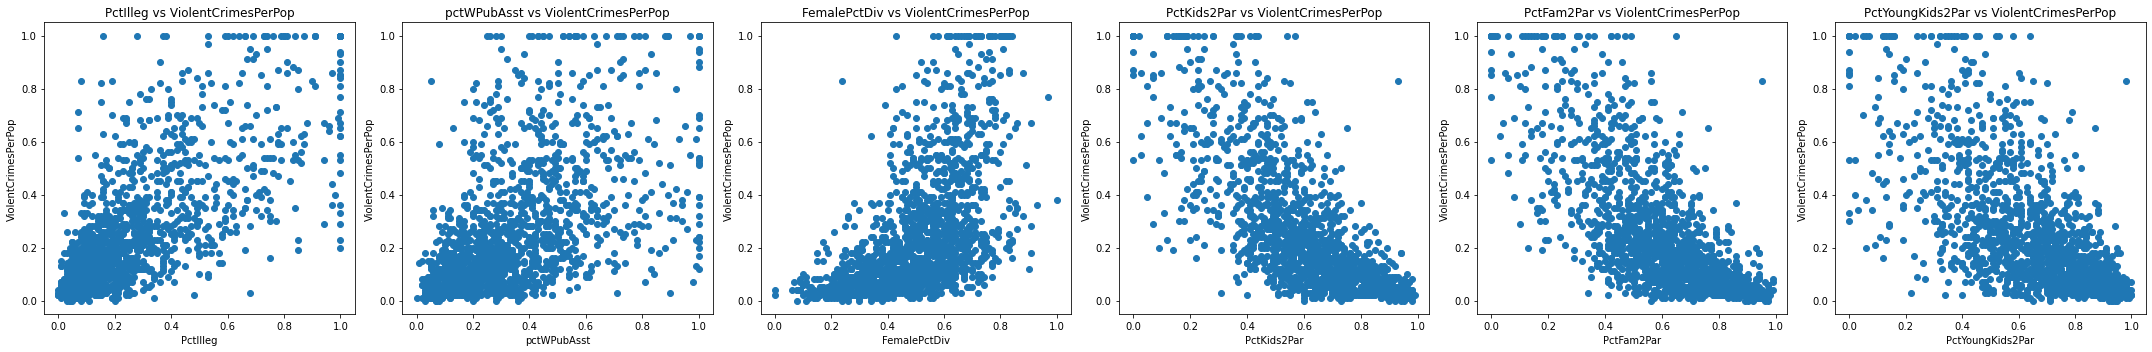

In [18]:
topFeatures = ['PctIlleg', 'pctWPubAsst', 'FemalePctDiv', 'PctKids2Par', 'PctFam2Par', 'PctYoungKids2Par']
fig, axes = plt.subplots(nrows=1, ncols=len(topFeatures), figsize=(30, 5))
for i, feature in enumerate(topFeatures):
    axes[i].scatter(newTrainset[feature], newTrainset['ViolentCrimesPerPop'])
    axes[i].set_title(f'{feature} vs ViolentCrimesPerPop')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('ViolentCrimesPerPop')

plt.tight_layout()
plt.show()



What we can gather from this is, the lower the percentage of kids born to nevver married parents (pctIlleg) the lower the crime rate.
Same thing with percentage of households with public assistance income in 1989 (pctWPubAsst) and violent crime.
If a family with kids are headed by two parents (PctFame2Par) the crime rate is lower. 
What might be immediet 